In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Eco-Totem_Capital_City_Trail_Bike_Counts.csv")
data.head()

,Count_Date,Count,OBJECTID
0,6/23/2015 11:00,92.0,0
1,6/23/2015 12:00,191.0,1
2,6/23/2015 13:00,156.0,2
3,6/23/2015 14:00,155.0,3
4,6/23/2015 15:00,243.0,4


In [3]:
data.tail()

,Count_Date,Count,OBJECTID
44022,6/30/2020 19:00,231.0,44022
44023,6/30/2020 20:00,142.0,44023
44024,6/30/2020 21:00,78.0,44024
44025,6/30/2020 22:00,20.0,44025
44026,6/30/2020 23:00,5.0,44026


In [4]:
data["Count_Date"] = pd.to_datetime(data["Count_Date"])
data

,Count_Date,Count,OBJECTID
0,2015-06-23 11:00:00,92.0,0
1,2015-06-23 12:00:00,191.0,1
2,2015-06-23 13:00:00,156.0,2
3,2015-06-23 14:00:00,155.0,3
4,2015-06-23 15:00:00,243.0,4
...,...,...,...
44022,2020-06-30 19:00:00,231.0,44022
44023,2020-06-30 20:00:00,142.0,44023
44024,2020-06-30 21:00:00,78.0,44024
44025,2020-06-30 22:00:00,20.0,44025


In [5]:
# Extract date information
data["month"] = data.Count_Date.dt.month
data["year"] = data.Count_Date.dt.year
data["day"] = data.Count_Date.dt.day
data["hour"] = data.Count_Date.dt.hour
data["day_of_week"] = data.Count_Date.dt.dayofweek

In [6]:
data.head()

,Count_Date,Count,OBJECTID,month,year,day,hour,day_of_week
0,2015-06-23 11:00:00,92.0,0,6,2015,23,11,1
1,2015-06-23 12:00:00,191.0,1,6,2015,23,12,1
2,2015-06-23 13:00:00,156.0,2,6,2015,23,13,1
3,2015-06-23 14:00:00,155.0,3,6,2015,23,14,1
4,2015-06-23 15:00:00,243.0,4,6,2015,23,15,1


In [7]:
def map_season(x):
    if x < 3 or x > 11:
        return "winter"
    elif x >= 3 and x <= 4:
        return "spring"
    elif x >= 5 and x <= 8:
        return "summer"
    else:
        return "fall"
    
data["season"] = data["month"].apply(map_season)
data.head()
    

,Count_Date,Count,OBJECTID,month,year,day,hour,day_of_week,season
0,2015-06-23 11:00:00,92.0,0,6,2015,23,11,1,summer
1,2015-06-23 12:00:00,191.0,1,6,2015,23,12,1,summer
2,2015-06-23 13:00:00,156.0,2,6,2015,23,13,1,summer
3,2015-06-23 14:00:00,155.0,3,6,2015,23,14,1,summer
4,2015-06-23 15:00:00,243.0,4,6,2015,23,15,1,summer


In [8]:
data["covid"] = data[["month", "year"]].apply(lambda x: True if x["month"] >= 3 and x["year"] == 2020 else False, axis = 1)
data.sample(10)

,Count_Date,Count,OBJECTID,month,year,day,hour,day_of_week,season,covid
21511,2017-12-05 18:00:00,35.0,21511,12,2017,5,18,1,winter,False
9933,2016-08-10 08:00:00,191.0,9933,8,2016,10,8,2,summer,False
327,2015-07-07 02:00:00,2.0,327,7,2015,7,2,1,summer,False
6486,2016-03-19 17:00:00,36.0,6486,3,2016,19,17,5,spring,False
29964,2018-11-22 23:00:00,2.0,29964,11,2018,22,23,3,fall,False
6856,2016-04-04 03:00:00,1.0,6856,4,2016,4,3,0,spring,False
12390,2016-11-20 17:00:00,15.0,12390,11,2016,20,17,6,fall,False
24388,2018-04-04 15:00:00,25.0,24388,4,2018,4,15,2,spring,False
27487,2018-08-11 18:00:00,241.0,27487,8,2018,11,18,5,summer,False
6623,2016-03-25 10:00:00,17.0,6623,3,2016,25,10,4,spring,False


<AxesSubplot:xlabel='hour'>

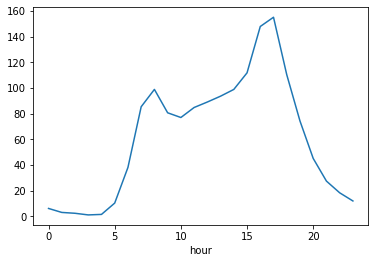

In [9]:
data.groupby("hour").mean()['Count'].plot()

Text(0, 0.5, 'avg_count')

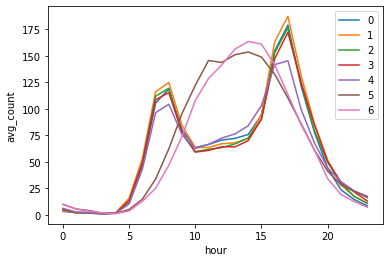

In [10]:
fig,ax = plt.subplots()
for day in list(sorted(data["day_of_week"].unique())):
    data_day = data[data["day_of_week"] == day]
    data_day.groupby("hour").mean()["Count"].plot(label = day)
    
ax.legend()
ax.set_ylabel("avg_count")


# sns.lineplot(df_hour_weekday["hour"], df_hour_weekday["Count"], hue=df_hour_weekday["day_of_week"])

Text(0, 0.5, 'avg_count')

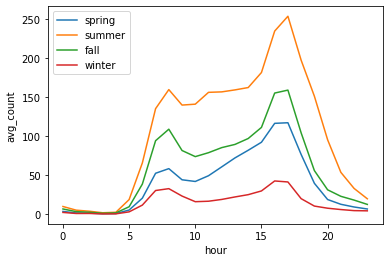

In [11]:
fig,ax = plt.subplots()
for season in ["spring", "summer","fall","winter"]:
    data_season = data[data["season"] == season]
    data_season.groupby("hour").mean()["Count"].plot(label = season)
ax.legend()
ax.set_ylabel("avg_count")

Text(0, 0.5, 'avg_count')

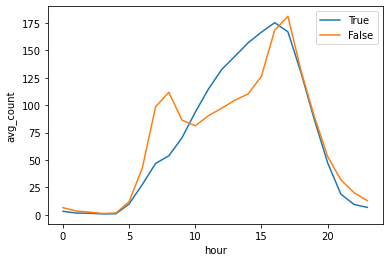

In [12]:
fig,ax = plt.subplots()
for covid in [True, False]:
    data_covid = data[(data["covid"] == covid) & (data["month"].isin([3,4,5,6]))]
    data_covid.groupby("hour").mean()["Count"].plot(label = covid)
ax.legend()
ax.set_ylabel("avg_count")

# 